In [25]:
import pandas as pd
import matplotlib as plt
import numpy as np

Informasi terkait tabel:


1. user_name	= The name of the user, as they’ve defined it.

2. user_location =	The user-defined location for this account’s profile.

3. user_description =	The user-defined UTF-8 string describing their account.

4. user_created =	Time and date, when the account was created.

5. user_followers =	The number of followers an account currently has.

6. user_friends =	The number of friends an account currently has.

7. user_favourites =	The number of favorites an account currently has

8. user_verified =	When true, indicates that the user has a verified account

9. date =	UTC time and date when the Tweet was created

10. text =	The actual UTF-8 text of the Tweet

11. hashtags =	All the other hashtags posted in the tweet along with #Bitcoin & #btc

12. source =	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web

13. is_retweet =	Indicates whether this Tweet has been Retweeted by the authenticating user.

# DATA LOADING

In [26]:
df = pd.read_csv('sampling_fp.csv')

In [27]:
df

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound,sentiment_vader,sentiment_type
0,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,...,False,Yes,en,today that s this we will do a take with our ...,58,13,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939,POSITIVE,POSITIVE
1,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,...,False,Yes,en,trade on enjoy of the trading fee sign up link,48,10,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939,POSITIVE,POSITIVE
2,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,...,False,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL
3,25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288.0,2656.0,False,2021-02-10 23:44:43,...,False,Yes,en,mastercard will let merchants accept payments...,71,11,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818,POSITIVE,POSITIVE
4,52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696.0,14546.0,False,2021-02-10 23:31:35,...,False,Yes,en,if i was to ask every bitcoin whale for a chan...,104,23,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6808,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52317,2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,...,False,Yes,en,the space field game has started buy spo amp ...,138,29,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.8070,POSITIVE,POSITIVE
52318,2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,...,False,Yes,en,are you scared of crashing again,33,6,"{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,NEGATIVE,NEGATIVE
52319,2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,...,False,Yes,en,the majority of users will be just watching t...,171,32,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...",0.3612,POSITIVE,POSITIVE
52320,2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,...,False,Yes,en,this should tell you plenty do not hold paper ...,78,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL


Data ada emoticon, ada hastag , ada url dan ada \n\.
mungkin yang berhubungan dengan user yang perlu dipake cuman followers sama verified dan tanggal tweet dibuat

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52322 entries, 0 to 52321
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        52322 non-null  int64  
 1   user_name         52322 non-null  object 
 2   user_location     26486 non-null  object 
 3   user_description  46044 non-null  object 
 4   user_created      52322 non-null  object 
 5   user_followers    52322 non-null  float64
 6   user_friends      52322 non-null  float64
 7   user_favourites   52322 non-null  float64
 8   user_verified     52322 non-null  bool   
 9   date              52322 non-null  object 
 10  text              52322 non-null  object 
 11  hashtags          50744 non-null  object 
 12  source            52322 non-null  object 
 13  is_retweet        52322 non-null  bool   
 14  random_sample     52322 non-null  object 
 15  lang              52322 non-null  object 
 16  cleaned_text      52322 non-null  object

semuanya object dan hanya followers saja yang float. jika dilihat dari tabel, friends dan favourites seharusnya terbaca float

In [29]:
df.isnull().sum()

Unnamed: 0              0
user_name               0
user_location       25836
user_description     6278
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags             1578
source                  0
is_retweet              0
random_sample           0
lang                    0
cleaned_text            0
tweet_length            0
num_words               0
vader                   0
compound                0
sentiment_vader         0
sentiment_type          0
dtype: int64

semuanya punya missing values

In [30]:
#cleaning missing values
df_clean = df.dropna(subset=(['user_name', 
                                'user_created', 
                                'user_followers', 
                                'user_friends', 
                                'user_favourites', 
                                'user_verified', 
                                'date', 
                                'text', 
                                'source', 
                                'is_retweet']))
df_clean.reset_index(drop=True, inplace= True)

In [31]:
df_clean.isnull().sum()

Unnamed: 0              0
user_name               0
user_location       25836
user_description     6278
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags             1578
source                  0
is_retweet              0
random_sample           0
lang                    0
cleaned_text            0
tweet_length            0
num_words               0
vader                   0
compound                0
sentiment_vader         0
sentiment_type          0
dtype: int64

label disini adalah is_retweet. kita bakalan buat label baru yang berupa sentiment tersebut.

In [32]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52322 entries, 0 to 52321
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        52322 non-null  int64         
 1   user_name         52322 non-null  object        
 2   user_location     26486 non-null  object        
 3   user_description  46044 non-null  object        
 4   user_created      52322 non-null  object        
 5   user_followers    52322 non-null  float64       
 6   user_friends      52322 non-null  float64       
 7   user_favourites   52322 non-null  float64       
 8   user_verified     52322 non-null  bool          
 9   date              52322 non-null  datetime64[ns]
 10  text              52322 non-null  object        
 11  hashtags          50744 non-null  object        
 12  source            52322 non-null  object        
 13  is_retweet        52322 non-null  bool          
 14  random_sample     5232

In [34]:
df_clean.date.sort_values(ascending=True)

1849    2021-02-05 10:52:04
1850    2021-02-05 10:52:04
1848    2021-02-05 11:00:01
1846    2021-02-05 11:00:03
1847    2021-02-05 11:00:03
                ...        
49552   2022-03-19 23:58:06
49551   2022-03-19 23:58:55
49550   2022-03-19 23:59:02
49555   2022-03-19 23:59:24
49549   2022-03-19 23:59:24
Name: date, Length: 52322, dtype: datetime64[ns]

## EXPLORATION DATA ANALYSIS

In [35]:
from langdetect import detect

In [36]:
#drop invalid language
# invalid_text = []
# valid_text = []

# for i in df_clean.index:
#   try:
#     a = detect(df_clean.at[i,'text'])
#     valid_text.append(a)
#   except: 
#     invalid_text.append(i)
    
# data = df_clean.drop(index =invalid_text)

#create new columns of language
# data['language'] = data['text'].map(lambda desc: detect(desc))
# data.head()

In [37]:
# data['lang'] = valid_text

In [38]:
data = df_clean.copy()

In [39]:
import re

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Total Language: 1


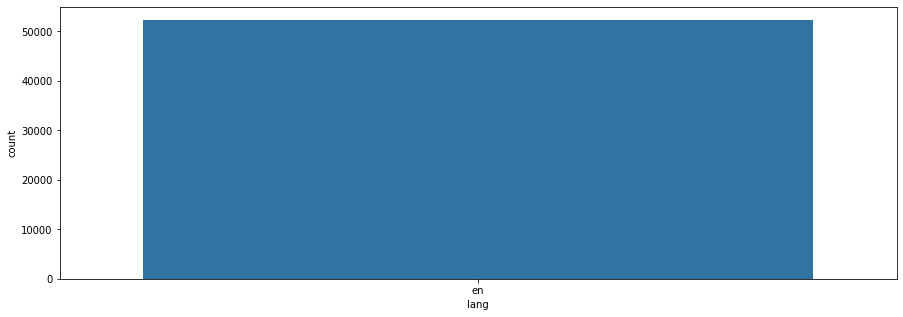

In [41]:
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(x="lang", data=data, ax=ax);
print('Total Language:', data.lang.nunique())

There is 33 language used for tweets. we will use only english language.

In [42]:
data = data[(data.lang == 'en')]
data

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound,sentiment_vader,sentiment_type
0,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,...,False,Yes,en,today that s this we will do a take with our ...,58,13,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939,POSITIVE,POSITIVE
1,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,...,False,Yes,en,trade on enjoy of the trading fee sign up link,48,10,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939,POSITIVE,POSITIVE
2,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,...,False,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL
3,25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288.0,2656.0,False,2021-02-10 23:44:43,...,False,Yes,en,mastercard will let merchants accept payments...,71,11,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818,POSITIVE,POSITIVE
4,52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696.0,14546.0,False,2021-02-10 23:31:35,...,False,Yes,en,if i was to ask every bitcoin whale for a chan...,104,23,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6808,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52317,2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,...,False,Yes,en,the space field game has started buy spo amp ...,138,29,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.8070,POSITIVE,POSITIVE
52318,2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,...,False,Yes,en,are you scared of crashing again,33,6,"{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,NEGATIVE,NEGATIVE
52319,2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,...,False,Yes,en,the majority of users will be just watching t...,171,32,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...",0.3612,POSITIVE,POSITIVE
52320,2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,...,False,Yes,en,this should tell you plenty do not hold paper ...,78,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL


In [43]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [44]:
#clean df 
def cleaning(data):
    text = re.sub(r'http\S+',' ', data)  #remove urls
    text = re.sub(r'@\w+',' ', text) #remove mentions
    text = re.sub(r'#\w+', ' ', text) #remove hashtag
    text = re.sub('[^A-Za-z]+', ' ', text) #remove characters that not use in the english alphabets
    text = text.lower() #lower caps
    text = re.sub('\w*\d\w*','', text) #remove digit
    

    return text

In [45]:
data['cleaned_text'] = data['text'].apply(cleaning)
data['cleaned_text']

0         today that s this we will do a take with our ...
1          trade on enjoy of the trading fee sign up link 
2         rsr i know i told you guys the target was i k...
3         mastercard will let merchants accept payments...
4        if i was to ask every bitcoin whale for a chan...
                               ...                        
52317     the space field game has started buy spo amp ...
52318                    are you scared of crashing again 
52319     the majority of users will be just watching t...
52320    this should tell you plenty do not hold paper ...
52321    tewl icv xyn vr c chmqds ixa qwvc can you help...
Name: cleaned_text, Length: 52322, dtype: object

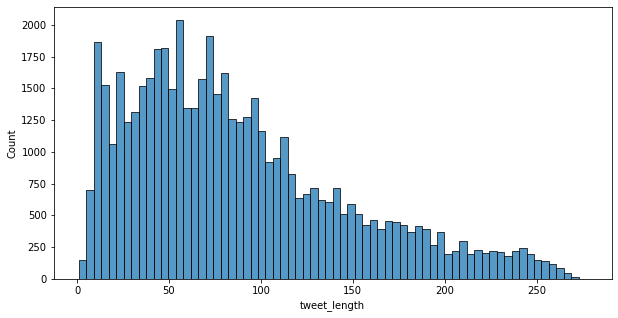

In [46]:
data["tweet_length"] = data["cleaned_text"].apply(len)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="tweet_length");

mean of num word: 16.309315393142462
min of num words: 0
max of num word: 62


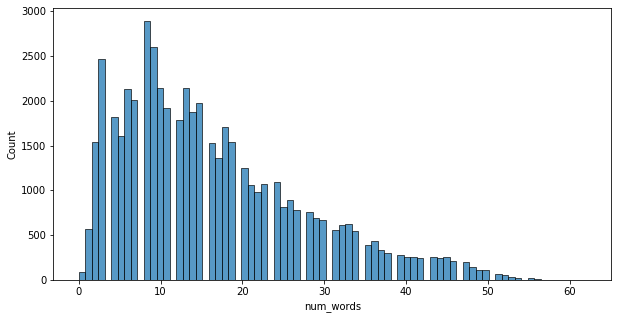

In [47]:
def count_words(x):
    return len(x.split())

data["num_words"] = data["cleaned_text"].apply(count_words)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="num_words");
print('mean of num word:', data.num_words.mean())
print('min of num words:',min(data["num_words"]))
print('max of num word:',max(data["num_words"]) )

## common words with wordcloud

## Sentiment analysis

In [48]:
import nltk

In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/krisbiantoroprabowo/nltk_data...


True

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [51]:
sid = SentimentIntensityAnalyzer()

In [52]:
data['vader'] = data['text'].apply(lambda desc: sid.polarity_scores(desc))

In [53]:
data['compound'] = data['vader'].apply(lambda score_dict: score_dict['compound'])
data.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound,sentiment_vader,sentiment_type
0,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,...,False,Yes,en,today that s this we will do a take with our ...,58,13,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939,POSITIVE,POSITIVE
1,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,...,False,Yes,en,trade on enjoy of the trading fee sign up link,48,10,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939,POSITIVE,POSITIVE
2,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,...,False,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL
3,25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288.0,2656.0,False,2021-02-10 23:44:43,...,False,Yes,en,mastercard will let merchants accept payments...,71,11,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818,POSITIVE,POSITIVE
4,52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696.0,14546.0,False,2021-02-10 23:31:35,...,False,Yes,en,if i was to ask every bitcoin whale for a chan...,104,23,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6808,POSITIVE,POSITIVE


In [54]:
data['sentiment_vader'] = ''
data.loc[data.compound>0, 'sentiment_vader']='POSITIVE'
data.loc[data.compound==0, 'sentiment_vader']='NEUTRAL'
data.loc[data.compound<0, 'sentiment_vader']='NEGATIVE'

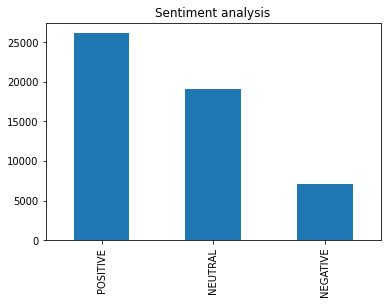

In [55]:
data.sentiment_vader.value_counts().plot(kind='bar', title='Sentiment analysis');

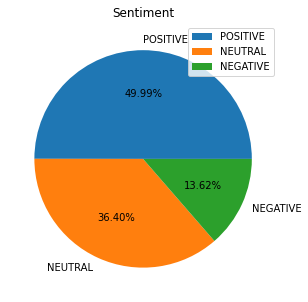

In [57]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(data.sentiment_vader.value_counts(),labels=data.sentiment_vader.unique(), autopct='%.2f%%')
ax.set_title('Sentiment')
plt.legend()

In [59]:
data_weight = data.copy()

In [68]:
math.log10(data_weight.iloc[1].user_followers)

2.870403905279027

In [80]:
import math 

def generate_impact_score(compound_tweet):
    coef_verified = 2 if compound_tweet.user_verified else 1
    log_follower = math.log10(compound_tweet.user_followers + 1 )  # +1 dipake buat kalo follower 0, soalnya log(0) bakal error
    impact_score = coef_verified * compound_tweet.compound * log_follower
    return impact_score

data_weight['impact_score'] = data.apply(generate_impact_score, axis=1)

In [81]:
data_weight[["text", "user_followers", "user_verified", "impact_score"]]

,text,user_followers,user_verified,impact_score
0,"😎 Today, that's this #Thursday, we will do a ""...",6769.0,False,1.891928
1,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,742.0,False,1.417981
2,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,104.0,False,0.000000
3,#Bitcoin #BTC #ADA #DOT Mastercard Will Let Me...,62.0,False,0.686988
4,If I was to ask every bitcoin whale for a chan...,282.0,False,1.669176
...,...,...,...,...
52317,🧑‍🚀The Space Field Game has started!\n\nBuy $S...,922.0,False,2.392918
52318,Are you scared of #BTC crashing again?,860.0,False,-1.292575
52319,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,4315.0,False,1.312991
52320,This should tell you plenty. DO NOT hold pape...,50.0,False,0.000000


# DATA PREPROCESSING

In [95]:
#split dataset
X = data_weight
y= pd.get_dummies(data_weight['sentiment_vader']).values

In [96]:
X

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound,sentiment_vader,sentiment_type,impact_score
0,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,...,Yes,en,today that s this we will do a take with our ...,58,13,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.4939,POSITIVE,POSITIVE,1.891928
1,5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716.0,2444.0,False,2021-02-10 23:53:30,...,Yes,en,trade on enjoy of the trading fee sign up link,48,10,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939,POSITIVE,POSITIVE,1.417981
2,8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41.0,238.0,False,2021-02-10 23:52:25,...,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL,0.000000
3,25,Stefan Gyarmati,"München, Bayern",CEO & PRESIDENT SG GROUP,2009-06-01 21:00:46,62.0,288.0,2656.0,False,2021-02-10 23:44:43,...,Yes,en,mastercard will let merchants accept payments...,71,11,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.3818,POSITIVE,POSITIVE,0.686988
4,52,Would you give me 100 bitcoin ?,London,Start with nothing you will Succeed . Be creat...,2019-06-21 05:54:35,282.0,696.0,14546.0,False,2021-02-10 23:31:35,...,Yes,en,if i was to ask every bitcoin whale for a chan...,104,23,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6808,POSITIVE,POSITIVE,1.669176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52317,2569348,Space Eco System,The Moon,The Space Field Game is a decentralized game b...,2022-03-05 11:02:20,922.0,0.0,7.0,False,2022-03-14 19:39:38,...,Yes,en,the space field game has started buy spo amp ...,138,29,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.8070,POSITIVE,POSITIVE,2.392918
52318,2569358,Anna,Seattle,"#NFT newbie，Travelers who like art, life, foodies",2012-11-09 16:05:42,860.0,54.0,1426.0,False,2022-03-14 19:38:44,...,Yes,en,are you scared of crashing again,33,6,"{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,NEGATIVE,NEGATIVE,-1.292575
52319,2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,...,Yes,en,the majority of users will be just watching t...,171,32,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...",0.3612,POSITIVE,POSITIVE,1.312991
52320,2569374,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,...,Yes,en,this should tell you plenty do not hold paper ...,78,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,NEUTRAL,0.000000


In [97]:
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
#split to train adnd test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

#split to train and val set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=16)

# Feature Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train['impact_score'].values.reshape(-1,1))

X_train_weight = scaler.transform(X_train['impact_score'].values.reshape(-1,1))
X_val_weight = scaler.transform(X_val['impact_score'].values.reshape(-1,1))
X_test_weight = scaler.transform(X_test['impact_score'].values.reshape(-1,1))

In [106]:
X_train_weight

array([[0.50139642],
       [0.52891296],
       [0.55012706],
       ...,
       [0.43962536],
       [0.51206725],
       [0.38355591]])

## Tokenisasi